In [3]:
from google.colab import files
uploaded = files.upload()

print(df.columns)



Saving coin_crypto.csv to coin_crypto (1).csv
Index(['SNo', 'Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap'],
      dtype='object')


Saving coin_crypto.csv to coin_crypto (3).csv
Columns: Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')


<ipython-input-7-09582f8910f4>:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Price'] = df['Close'].fillna(method='ffill')
<ipython-input-7-09582f8910f4>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Price'].resample('M').mean()
<ipython-input-7-09582f8910f4>:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df['Price'].resample('Y').mean()


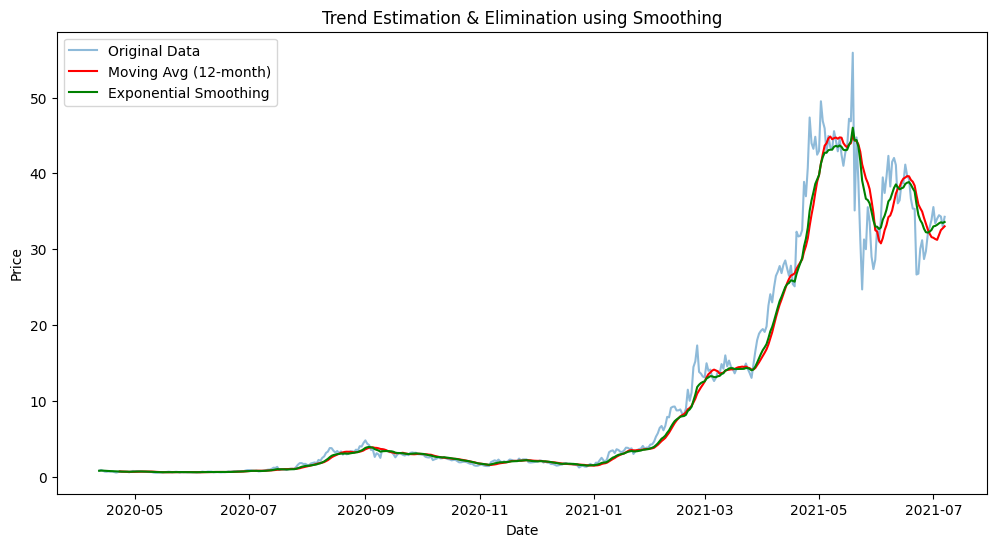

In [7]:
# Step 1: Upload file
from google.colab import files
uploaded = files.upload()

# Step 2: Load and process data
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("coin_crypto.csv")

# Show column names to verify
print("Columns:", df.columns)

# Rename for consistency
df.rename(columns={'timestamp': 'Date', 'close': 'Price'}, inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set index
df.set_index('Date', inplace=True)

# Forward fill missing prices
df['Price'] = df['Close'].fillna(method='ffill')

# Monthly and yearly aggregation
df_monthly = df['Price'].resample('M').mean()
df_yearly = df['Price'].resample('Y').mean()

# Moving average and exponential smoothing
df['Moving_Avg'] = df['Price'].rolling(window=12).mean()
df['Exp_Smooth'] = df['Price'].ewm(span=12, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label="Original Data", alpha=0.5)
plt.plot(df['Moving_Avg'], label="Moving Avg (12-month)", color='red')
plt.plot(df['Exp_Smooth'], label="Exponential Smoothing", color='green')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Trend Estimation & Elimination using Smoothing")
plt.legend()
plt.show()
